In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations
from src.preprocessing import DataProcess

In [2]:
# processor = DataProcess(
#     '../scraped_cian_raw.csv path',
#     '../scraped_cian_interim.csv path',
#     '../scraped_cian_processed.csv path',
#     None
# )
# processor.run_processed()

In [3]:
data = pd.read_csv('../data/processed/scraped_cian_processed.csv')

# Unique author_type values

In [4]:
data['author_type'].unique()

array(['Агент по недвижимости', 'Застройщик', 'Владелец', 'Риэлтор',
       'Официальный представитель', 'Титулованный застройщик',
       'Неизвестно'], dtype=object)

# Unique district values

In [5]:
data['district'].unique()

array(['Мещанский', 'Даниловский', 'Хорошево-Мневники', 'Дорогомилово',
       'Раменки', 'Хорошевский', 'Очаково-Матвеевское', 'Филевский парк',
       'Обручевский', 'Южнопортовый', 'Савеловский', 'Перово',
       'Орехово-Борисово Южное', 'Отрадное', 'Нагатинский затон',
       'Нагорный', 'Люблино', 'Гольяново', 'Беговой', 'Пресненский',
       'Преображенское', 'Нагатино-Садовники', 'Покровское-Стрешнево',
       'Западное Дегунино', 'Левобережный', 'Останкинский', 'Марфино',
       'Таганский', 'Басманный', 'Богородское', 'Марьина роща', 'Марьино',
       'Строгино', 'Арбат', 'Донской', 'Южное Тушино', 'Текстильщики',
       'Щукино', 'Вешняки', 'Головинский', 'Аэропорт', 'Рязанский',
       'Коньково', 'Проспект Вернадского', 'Чертаново Южное',
       'Гагаринский', 'Бутырский', 'Нижегородский', 'Черемушки',
       'Дмитровский', 'Южное Бутово', 'Тверской', 'Академический',
       'Косино-Ухтомский', 'Тропарево-Никулино', 'Сокол',
       'Красносельский', 'Кунцево', 'Северное Бу

# Unique underground values

In [6]:
data['underground'].unique()

array(['Проспект Мира', 'Павелецкая', 'Терехово ', 'Киевская', 'Минская',
       'Аэропорт', 'Давыдково', 'Народное Ополчение', 'Калужская',
       'Волгоградский проспект', 'Дмитровская', 'Перово', 'Домодедовская',
       'Полежаевская', 'Владыкино', 'Технопарк', 'Севастопольская',
       'Ломоносовский проспект', 'Люблино', 'Щёлковская', 'Белорусская',
       'Преображенская площадь', 'Каширская', 'Спартак', 'Моссельмаш',
       'Нагатинская', 'Угрешская', 'Беломорская', 'Шелепиха',
       'Алексеевская', 'Краснопресненская', 'Телецентр',
       'Крестьянская застава', 'Бауманская', 'Бульвар Рокоссовского',
       'Савёловская', 'Тульская', 'Братиславская', 'Строгино',
       'Смоленская', 'Площадь Гагарина', 'Сходненская', 'Озёрная',
       'Текстильщики', 'Щукинская', 'Фили', 'Новогиреево', 'Селигерская',
       'Коптево', 'ЗИЛ', 'Новаторская', 'Гражданская', 'Аминьевская',
       'Электрозаводская', 'Динамо', 'Марьина Роща', 'Окская', 'Беляево',
       'Проспект Вернадского', 'Про

# Below we can see some visualisation on mean flat price depending on some features

## So, we can see that Mean Price Distribution among underground and district features has very noisy graphics. We cann't estimate some useful information from it. But we can see, that mean price of flats on lower floors, with small square and small rooms count much cheeper. Also need to be said, that there is a huge difference between authors of advertisments. All these features except underground and district, has a significant impact -> we need to perform additional hypotesis estimation on independence for price.

# Also, we need to check the hypotesis that official_representative author mean price higher than representative developer 

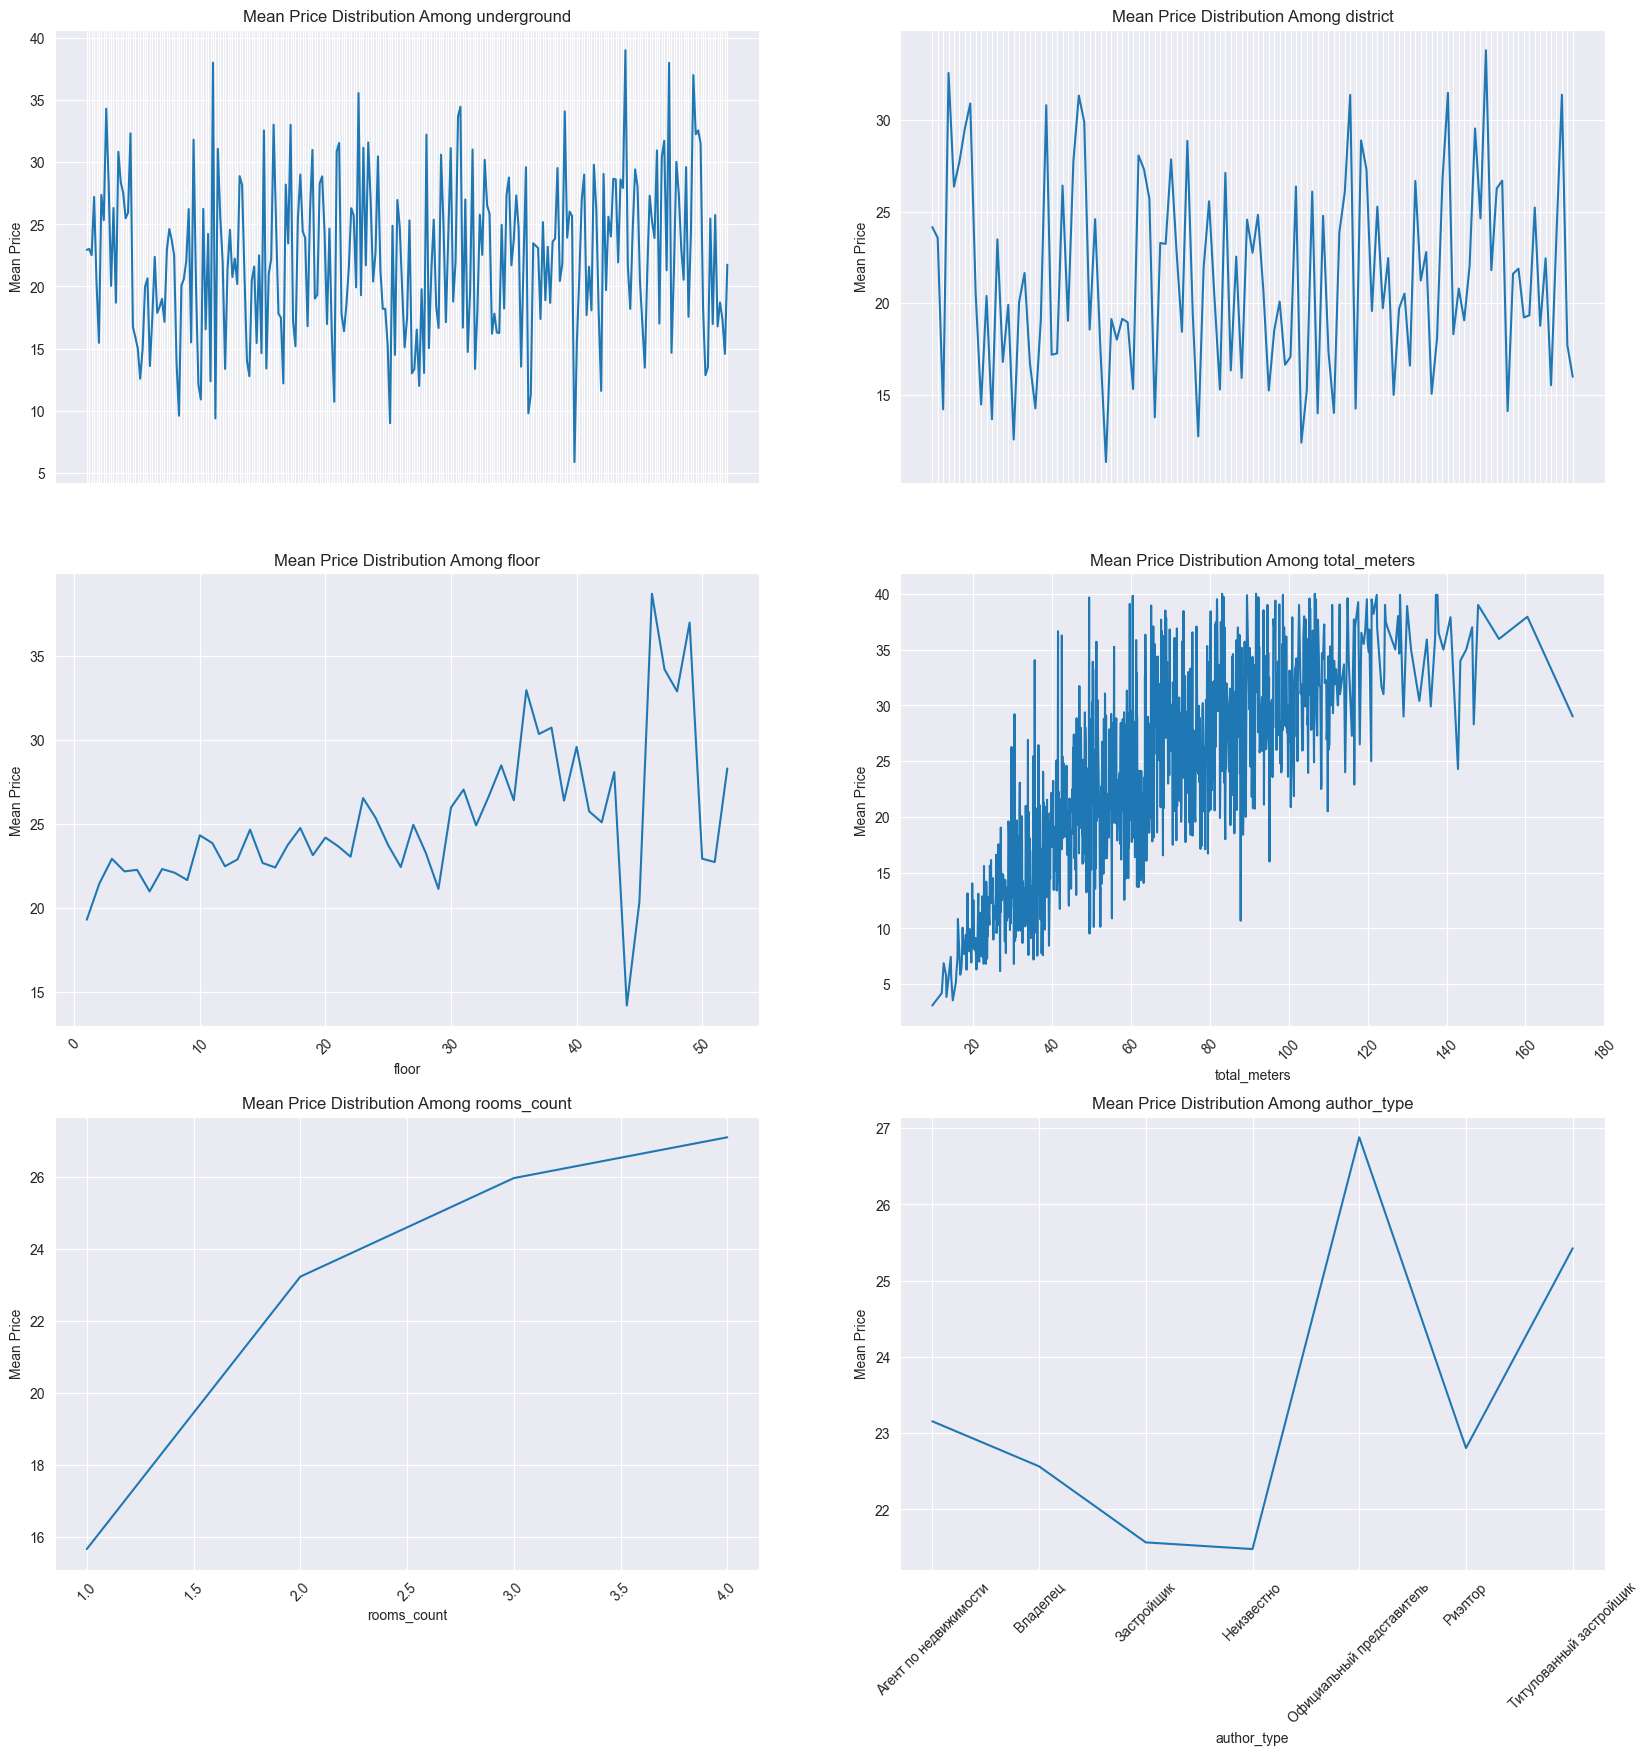

In [7]:
features = ['underground', 'district', 'floor', 'total_meters', 'rooms_count', 'author_type']
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.plot(sorted(data[feature].unique().tolist()), data.groupby([feature]).mean('price')['price'])
    ax.set_title(f"Mean Price Distribution Among {feature}")
    if (row, col) in [(0, 0), (0, 1)]:
        ax.set_xticklabels([])
    else:
        ax.set_xlabel(f"{feature}")
    ax.set_ylabel("Mean Price")
    ax.tick_params(axis='x', rotation=45)
plt.show()

# Here, we have tried to check out outlier values, but there are none   

## Also, we need to mention, that 75% of data is under 31 million of rubles and 25% of data is under 15 millions. Median value is 22 millions approximately.

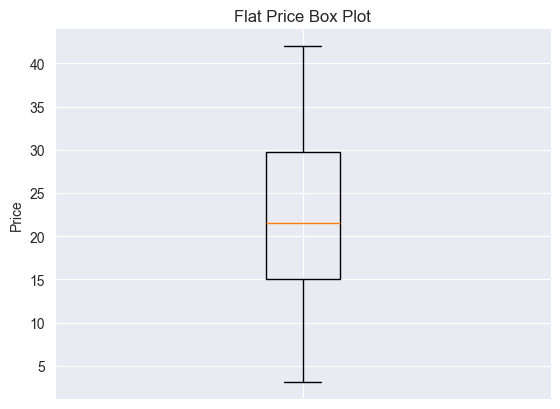

In [8]:
fig, ax = plt.subplots()
ax.boxplot(data['price'])
ax.set_title('Flat Price Box Plot')
ax.set_ylabel('Price')
ax.set_xticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

# Below we have linear dependecies between all the features in our dataset. 

/Users/deniskazhekin/Library/Caches/pypoetry/virtualenvs/avitoprediction-MTdtUoo0-py3.11/lib/python3.11/site-packages/dython/nominal.py:321: RuntimeWarning: Rounded eta = 1.0000000000000002 to 1. This is probably due to floating point precision issues.
  warnings.warn(
/Users/deniskazhekin/Library/Caches/pypoetry/virtualenvs/avitoprediction-MTdtUoo0-py3.11/lib/python3.11/site-packages/dython/nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/Users/deniskazhekin/Library/Caches/pypoetry/virtualenvs/avitoprediction-MTdtUoo0-py3.11/lib/python3.11/site-packages/dython/nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, ple

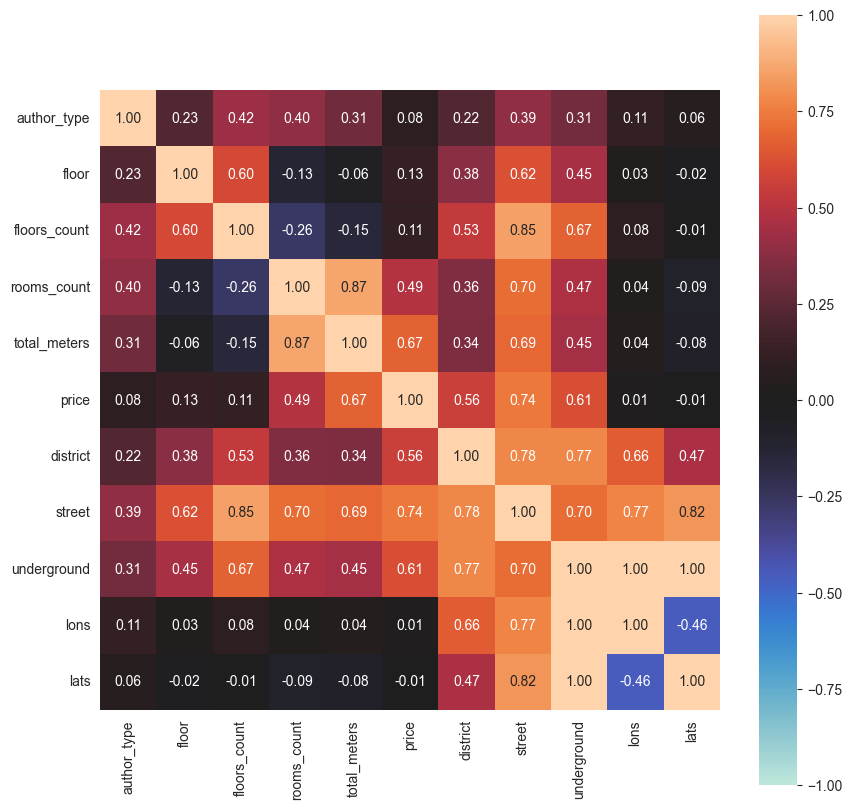

In [9]:
complete_correlation = associations(data, filename='comxplete_correlation.png', figsize=(10,10))

 # There is an interesting feature that street heavily impacts on the price and other features. Let's dive into and see how many unique streets we have.

# P.S. We can see that the majority of all streets apperas about 1-5 times, thus it's evidently that there is no correlation between price and street

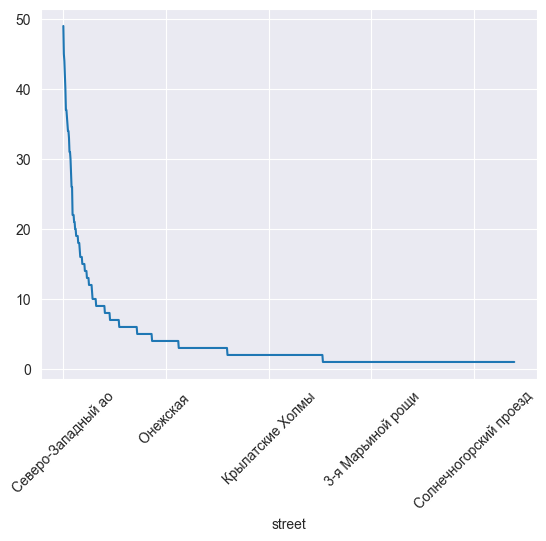

In [10]:
data['street'].value_counts(sort=True).plot()
plt.tick_params(axis='x', rotation=45)
plt.show()